# Dataset 2: Boston Housing Dataset

1. Load the dataset. You can download the dataset from this link.

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets

data = datasets.load_boston()
#data = pd.read_csv('./housing_data.csv', delimiter=',')
df = pd.DataFrame(data.data, columns=data.feature_names)

print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

2. Fit a linear regression model:

(a) Set MEDV as the target variable and the other attributes as the features and
ordinary least square as the penalty function.

(b) Perform a 10 fold cross validation, analyze the significance of different variables
with the statistics obtained from the model you have trained, and the averaged
Root Mean Squared Error (RMSE), and plot 1) fitted values against true values
as scatter plots using the whole dataset; 2) residuals versus fitted values as
scatter plots using the whole dataset.

In [3]:
target = pd.DataFrame(data.target, columns=["MEDV"])


#model = LinearRegression().fit(X,y)

In [28]:
import numpy as np

import matplotlib.pyplot as plt

def linear_regression(X, y, plot=True, model=LinearRegression()):
    kf = KFold(n_splits=10, shuffle=True)

    cv_train_rmse, cv_test_rmse = [], []
    min_test_rmse = float("inf")

    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        lm = model
        lm.fit(X_train, y_train)
        train_rmse = mse(lm.predict(X_train), y_train)
        test_rmse = mse(lm.predict(X_test), y_test)

        if test_rmse < min_test_rmse:
            min_test_rmse = test_rmse
            best_model = lm

        cv_train_rmse.append(train_rmse)
        cv_test_rmse.append(test_rmse)

    avg_train_rmse = np.sqrt(np.mean(cv_train_rmse))
    avg_test_rmse = np.sqrt(np.mean(cv_test_rmse))

    print("Coefficients are : ", best_model.coef_)
    best_model_y_predict = best_model.predict(X)
    if plot:
        best_model_y_predict = best_model_y_predict.reshape(y.shape)

        plt.figure(figsize=(8, 5))
        plt.scatter(y, best_model_y_predict, s=5)
        plt.xlabel("True values")
        plt.ylabel("Predicted values")
        plt.title("Fitted values vs True values")
        plt.show()

        plt.figure(figsize=(8, 5))
        plt.scatter(best_model_y_predict, y - best_model_y_predict, s=5)
        plt.xlabel("Fitted values")
        plt.ylabel("Residual values")
        plt.title("Residual values vs Fitted values")
        plt.show()

        plt.figure(figsize=(8, 5))
        plt.scatter(range(len(y)), y, c='g', marker='x', label='True values')
        plt.scatter(range(len(y)), best_model_y_predict, c='b', marker='o', label='Predicted Values')
        plt.title("Fitted values and True values")
        plt.legend(loc='upper left')
        plt.show()

        plt.figure(figsize=(8, 5))
        plt.scatter(range(len(y)), best_model_y_predict, c='g', s=5, zorder=2, label='Fitted values')
        plt.scatter(range(len(y)), np.subtract(y, best_model_y_predict), c='b', s=5, zorder=1, label='Residual Values')
        plt.title("Fitted values and Residual values")
        plt.legend(loc='upper left')
        plt.yscale('log')
        plt.show()
    return avg_train_rmse, avg_test_rmse

In [5]:
X = np.array([np.concatenate((v,[1])) for v in data.data])
y = target["MEDV"]
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def mse(predicted, actual):
    return mean_squared_error(predicted, actual)

p = linreg.predict(X)
# Now we can constuct a vector of errors
err = abs(p-y)
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))

cv_train_rmse, cv_test_rmse = [], []
min_test_rmse = float("inf")

    
kf = KFold(n_splits=10, shuffle=True)
xval_err = 0
for train,test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    linreg.fit(X[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(X[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    train_rmse = mse(linreg.predict(X_train), y_train)
    test_rmse = mse(linreg.predict(X_test), y_test)
    
    if test_rmse < min_test_rmse:
        min_test_rmse = test_rmse
        best_model = linreg

    cv_train_rmse.append(train_rmse)
    cv_test_rmse.append(test_rmse)

avg_train_rmse = np.sqrt(np.mean(cv_train_rmse))

= np.sqrt(np.mean(cv_test_rmse))
print("Coefficients are : ", best_model.coef_)
best_model_y_predict = best_model.predict(X)

rmse_10cv = np.sqrt(xval_err/len(X))

method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Coefficients are :  [-1.06414594e-01  4.84962449e-02 -1.05965071e-03  2.66218246e+00
 -1.75841612e+01  4.00451903e+00 -1.32150611e-03 -1.53462961e+00
  2.98971127e-01 -1.31777377e-02 -9.29639209e-01  8.44106338e-03
 -4.74809425e-01  0.00000000e+00]
Method: Simple Linear Regression
RMSE on training: 4.6792
RMSE on 10-fold CV: 4.8530


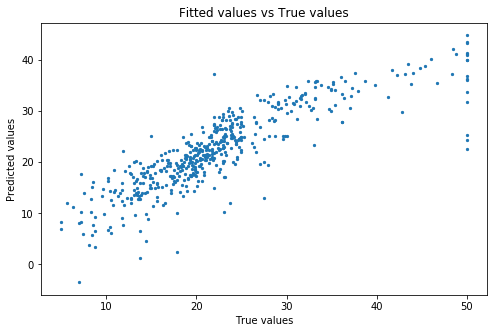

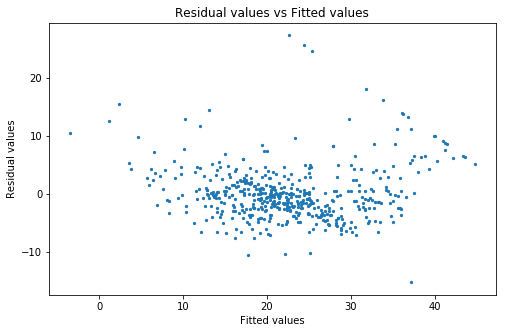

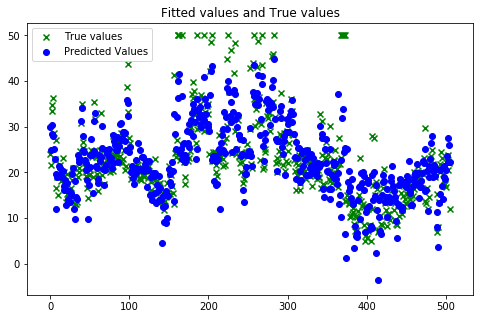

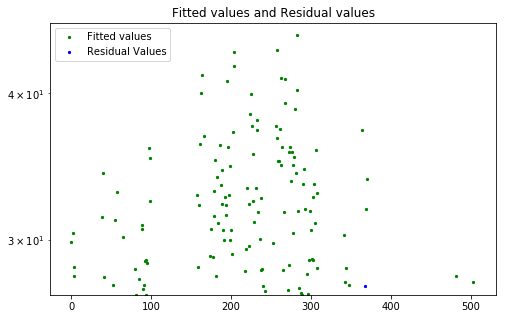

In [7]:
best_model_y_predict = best_model_y_predict.reshape(y.shape)

plt.figure(figsize=(8, 5))
plt.scatter(y, best_model_y_predict, s=5)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Fitted values vs True values")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(best_model_y_predict, y - best_model_y_predict, s=5)
plt.xlabel("Fitted values")
plt.ylabel("Residual values")
plt.title("Residual values vs Fitted values")
plt.show()


plt.figure(figsize=(8, 5))
plt.scatter(range(len(y)), y, c='g', marker='x', label='True values')
plt.scatter(range(len(y)), best_model_y_predict, c='b', marker='o', label='Predicted Values')
plt.title("Fitted values and True values")
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(range(len(y)), best_model_y_predict, c='g', s=5, zorder=2, label='Fitted values')
plt.scatter(range(len(y)), np.subtract(y, best_model_y_predict), c='b', s=5, zorder=1, label='Residual Values')
plt.title("Fitted values and Residual values")
plt.legend(loc='upper left')
plt.yscale('log')
plt.show()


3. In this part, we try to control overfitting via regularization of the parameters.

(a) You are asked to try the following regularizations with suitable parameters.
1. Ridge Regularizer
2. Lasso Regularizer
3. Elastic Net Regularizer (optional)

Optimize over choices of alpha to pick one good model, report the best
RMSE obtained via 10-fold cross validation. Compare the values of the esti-
mated coefficients for these regularized good models, with the unregularized
best model.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Coefficients are :  [-0.31561177  0.50121214 -0.91280197 ... -1.10340926 -0.77265671
 -0.86560088]


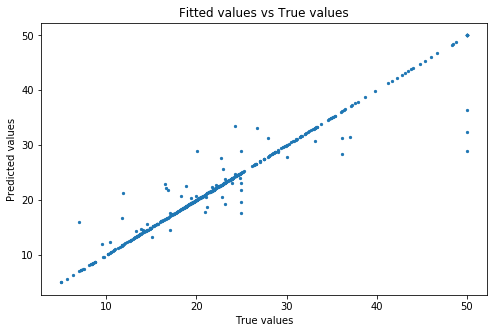

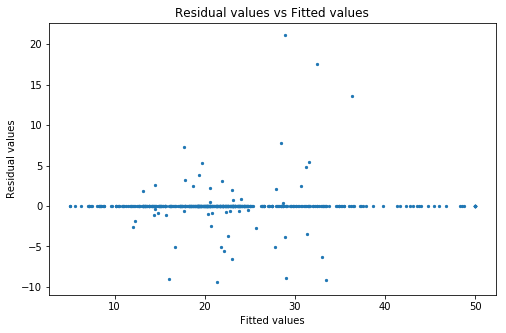

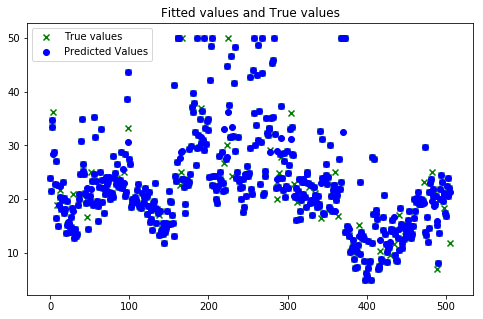

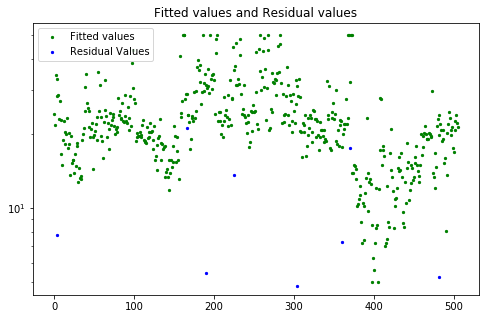

4.5614936164172925e-14 5.863139251146394


In [8]:
#Also performed one hot encoding which gives amazing results
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
X_2 = df.apply(le.fit_transform)
X_2.head()

enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehot_encoded = enc.transform(X_2).toarray()
onehot_encoded.shape

train_rmse, test_rmse = linear_regression(onehot_encoded, y)

print(train_rmse, test_rmse)

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

print('Lasso Regularization:')
train_rmse, test_rmse = linear_regression(X, y, plot=False, model = Lasso(alpha = 0.5))
print("Train RMSE:", train_rmse)
print("10 fold CV RMSE", test_rmse)
print('=======================================================================\n')



print('Ridge Regularization:')
train_rmse, test_rmse = linear_regression(X, y, plot=False, model = Ridge(alpha = 0.5))
print("Train RMSE:", train_rmse)
print("10 fold CV RMSE", test_rmse)
print('=======================================================================\n')


print('Elastic Net Regularization:')
train_rmse, test_rmse = linear_regression(X, y, plot=False, model = ElasticNet(alpha = 0.5))
print("Train RMSE:", train_rmse)
print("10 fold CV RMSE", test_rmse)




Lasso Regularization:
Coefficients are :  [-0.07405181  0.04129561 -0.          0.         -0.          2.88579543
  0.         -0.84737624  0.24984335 -0.01522482 -0.7942099   0.00897086
 -0.58856859  0.        ]
Train RMSE: 4.903139519719517
10 fold CV RMSE 5.120433302612981

Ridge Regularization:
Coefficients are :  [-1.15035269e-01  4.57762085e-02 -3.69686308e-02  2.58694799e+00
 -1.28696500e+01  3.89942405e+00 -1.39081964e-02 -1.45406917e+00
  2.99672507e-01 -1.23545337e-02 -8.32278533e-01  1.06784236e-02
 -4.71867917e-01  0.00000000e+00]
Train RMSE: 4.675633802611252
10 fold CV RMSE 4.901805558414571

Elastic Net Regularization:
Coefficients are :  [-0.09489423  0.05494705 -0.0248633   0.         -0.          1.80901037
  0.01075102 -0.90205124  0.29742402 -0.0161004  -0.84967734  0.00970256
 -0.66084811  0.        ]
Train RMSE: 4.9784160623700835
10 fold CV RMSE 5.102136081472344


In [34]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha_values = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])


def regularization_optimization(model, alpha_range=alpha_values):
    alpha_rmse = []
    for alpha in alpha_range:
        # print('Testing for Regularization strength = ', alpha)
        avg_test_rmse = []
        _, test_rmse = linear_regression(X, y, plot=False, model=model(alpha=alpha))
        avg_test_rmse.append(test_rmse)
        alpha_rmse.append(avg_test_rmse)

    return alpha_rmse


regularizations = ["Ridge", "Lasso", "ElasticNet"]

x_range = range(32)
for reg in regularizations:
    # alpha_range = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5,10]
    alpha_range = alpha_values
    alpha_rmse = regularization_optimization(model=eval(reg), alpha_range=alpha_range)

    for alpha in range(len(alpha_range)):
        print(alpha, min(alpha_rmse[alpha]), np.argmin(alpha_rmse[alpha]))
        #plt.plot(, alpha_rmse[alpha], label=alpha_range[alpha]



Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

Coefficients are :  [-9.78271461e-02  5.23008786e-02  2.75996588e-02  1.90143283e+00
 -1.69349924e+01  3.53502435e+00  2.97497684e-04 -1.45577110e+00
  3.14137302e-01 -1.28688229e-02 -9.46329855e-01  9.35314671e-03
 -5.31063269e-01  0.00000000e+00]
Coefficients are :  [-1.26133372e-01  4.35880427e-02  1.84418968e-03  2.72345516e+00
 -1.58804884e+01  3.87767805e+00  3.38366062e-03 -1.43141121e+00
  3.48747587e-01 -1.29417375e-02 -9.46189866e-01  1.02748461e-02
 -5.65609840e-01  0.00000000e+00]
Coefficients are :  [-1.04710991e-01  4.66362488e-02  2.98802574e-03  2.85341554e+00
 -1.18939750e+01  3.78640361e+00  3.59517438e-03 -1.31597458e+00
  3.01727744e-01 -1.32793855e-02 -9.04390794e-01  8.68627884e-03
 -5.83972399e-01  0.00000000e+00]
Coefficients are :  [-1.06775422e-01  4.41965923e-02 -2.14816585e-02  2.82312069e+00
 -9.41440665e+00  3.78766669e+00 -5.83140881e-03 -1.38104658e+00
  2.83773076e-01 -1.19033616e-02 -9.11931845e-01  9.7639

Coefficients are :  [-0.08858672  0.05996211 -0.06658575  1.4183365  -1.39097731  3.2568457
  0.00405085 -1.25449826  0.31236584 -0.01570496 -0.77762982  0.01079185
 -0.61564855  0.        ]
Coefficients are :  [-0.10337475  0.04145682 -0.02849753  1.18073239 -1.06639056  3.64367968
 -0.00876794 -1.13427944  0.30150785 -0.01549621 -0.86440463  0.0098989
 -0.59712881  0.        ]
Coefficients are :  [-0.09656677  0.05216737 -0.01655981  1.63455182 -1.29921517  3.59861965
 -0.00598525 -1.17847931  0.28691989 -0.01542853 -0.73646505  0.00969198
 -0.59410239  0.        ]
Coefficients are :  [-9.77589388e-02  3.70989867e-02 -7.45480218e-02  1.57663880e+00
 -1.26013999e+00  3.40889718e+00 -1.63344637e-03 -1.06870737e+00
  2.86075897e-01 -1.31225705e-02 -8.86494955e-01  9.19939654e-03
 -6.16428131e-01  0.00000000e+00]
Coefficients are :  [-0.10323647  0.05149864 -0.03392239  1.11414341 -1.2151904   3.64359242
 -0.00865443 -1.2246775   0.2726299  -0.01474299 -0.82940098  0.01011684
 -0.5635381

Coefficients are :  [-0.          0.02469977 -0.          0.         -0.          0.
  0.         -0.          0.         -0.01282069 -0.          0.00754672
 -0.47416474  0.        ]
Coefficients are :  [-0.          0.03059786 -0.          0.         -0.          0.
  0.         -0.          0.         -0.01159458 -0.          0.00771913
 -0.46745191  0.        ]
Coefficients are :  [-0.          0.03523657 -0.          0.         -0.          0.
 -0.         -0.          0.         -0.01105256 -0.          0.00888402
 -0.44257181  0.        ]
Coefficients are :  [-0.          0.0246103  -0.          0.         -0.          0.
  0.         -0.          0.         -0.01289718 -0.          0.00837029
 -0.44254874  0.        ]
Coefficients are :  [-0.          0.03185424 -0.          0.         -0.          0.
 -0.         -0.          0.         -0.01233963 -0.          0.00870874
 -0.39521854  0.        ]
Coefficients are :  [-0.          0.02858122 -0.          0.         -0.        

Coefficients are :  [-0.          0.04007826 -0.          0.          0.          0.
  0.02346145 -0.          0.         -0.00920204 -0.          0.00701815
 -0.65203182  0.        ]
Coefficients are :  [-0.          0.04882976 -0.          0.          0.          0.
  0.02594084 -0.          0.         -0.00876875 -0.          0.00739342
 -0.62839535  0.        ]
Coefficients are :  [-0.          0.04115887 -0.          0.          0.          0.
  0.01524729 -0.          0.         -0.0113391  -0.          0.00693509
 -0.57836286  0.        ]
Coefficients are :  [-0.          0.03583253 -0.          0.          0.          0.
  0.00805693 -0.          0.         -0.01092446 -0.          0.00692764
 -0.56554727  0.        ]
Coefficients are :  [-0.          0.04286652 -0.          0.          0.          0.
  0.01999086 -0.          0.         -0.00930162 -0.          0.00902155
 -0.60827354  0.        ]
Coefficients are :  [-0.          0.03545332 -0.          0.          0.        

Coefficients are :  [-1.06414594e-01  4.84962449e-02 -1.05965071e-03  2.66218246e+00
 -1.75841612e+01  4.00451903e+00 -1.32150611e-03 -1.53462961e+00
  2.98971127e-01 -1.31777377e-02 -9.29639209e-01  8.44106338e-03
 -4.74809425e-01  0.00000000e+00]
Method: Ridge Regression
RMSE on training: 4.6854
RMSE on 10-fold CV: 4.8983


# QUESTION 1


In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('network_backup_dataset.csv',header=0)

In [26]:
day_no_to_key = {}

i=0
for d in data.values:  
    key = str(d[0])+","+str(d[1])
    if key not in day_no_to_key.keys():
        day_no_to_key[key]=i
        i = i+1

print(day_no_to_key)

{'1,Monday': 0, '1,Tuesday': 1, '1,Wednesday': 2, '1,Thursday': 3, '1,Friday': 4, '1,Saturday': 5, '1,Sunday': 6, '2,Monday': 7, '2,Tuesday': 8, '2,Wednesday': 9, '2,Thursday': 10, '2,Friday': 11, '2,Saturday': 12, '2,Sunday': 13, '3,Monday': 14, '3,Tuesday': 15, '3,Wednesday': 16, '3,Thursday': 17, '3,Friday': 18, '3,Saturday': 19, '3,Sunday': 20, '4,Monday': 21, '4,Tuesday': 22, '4,Wednesday': 23, '4,Thursday': 24, '4,Friday': 25, '4,Saturday': 26, '4,Sunday': 27, '5,Monday': 28, '5,Tuesday': 29, '5,Wednesday': 30, '5,Thursday': 31, '5,Friday': 32, '5,Saturday': 33, '5,Sunday': 34, '6,Monday': 35, '6,Tuesday': 36, '6,Wednesday': 37, '6,Thursday': 38, '6,Friday': 39, '6,Saturday': 40, '6,Sunday': 41, '7,Monday': 42, '7,Tuesday': 43, '7,Wednesday': 44, '7,Thursday': 45, '7,Friday': 46, '7,Saturday': 47, '7,Sunday': 48, '8,Monday': 49, '8,Tuesday': 50, '8,Wednesday': 51, '8,Thursday': 52, '8,Friday': 53, '8,Saturday': 54, '8,Sunday': 55, '9,Monday': 56, '9,Tuesday': 57, '9,Wednesday': 5

In [30]:
day_to_backup_size = {}

for d in data.values:
    key = str(d[0])+","+str(d[1])
    backup_size = d[5]
    if key not in day_to_backup_size.keys():
        day_to_backup_size[key]=0
    day_to_backup_size[key]+=backup_size

{'1,Monday': 16.662441452895028, '1,Tuesday': 8.012317076193304, '1,Wednesday': 7.3083169467783105, '1,Thursday': 10.421160912067915, '1,Friday': 9.876059211110848, '1,Saturday': 11.19774241947995, '1,Sunday': 11.15899306254798, '2,Monday': 17.601461134807803, '2,Tuesday': 8.248708133767488, '2,Wednesday': 7.256121282480543, '2,Thursday': 9.771171966011066, '2,Friday': 9.736093338220172, '2,Saturday': 11.467187840608108, '2,Sunday': 11.360356762244328, '3,Monday': 17.693142724124897, '3,Tuesday': 8.158120933085673, '3,Wednesday': 7.277152721304925, '3,Thursday': 10.144059987657949, '3,Friday': 9.951252173718043, '3,Saturday': 11.60460650794339, '3,Sunday': 11.189280107093431, '4,Monday': 17.46840525570713, '4,Tuesday': 7.91887562187176, '4,Wednesday': 7.265389409667876, '4,Thursday': 9.594929539737004, '4,Friday': 9.966533813601128, '4,Saturday': 11.660739445662443, '4,Sunday': 11.273448268675791, '5,Monday': 17.703871302047702, '5,Tuesday': 8.038423317548776, '5,Wednesday': 7.40484995

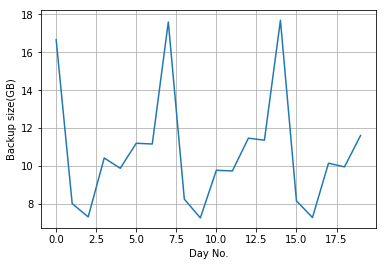

In [42]:
import matplotlib.pyplot as plt

twenty_days = [i for i in range(0,20)]
first_twenty_values = list(day_to_backup_size.values())[:20]
plt.plot(twenty_days, first_twenty_values)
plt.xlabel("Day No.")
plt.ylabel("Backup size(GB)")
plt.grid()
plt.show()

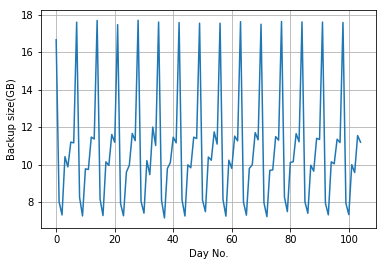

In [41]:
import matplotlib.pyplot as plt

twenty_days = [i for i in range(0,105)]
first_twenty_values = list(day_to_backup_size.values())[:105]
plt.plot(twenty_days, first_twenty_values)
plt.xlabel("Day No.")
plt.ylabel("Backup size(GB)")
plt.grid()
plt.show()